In [1]:
%matplotlib widget
import pandas as pd
import numpy as np # For data manipulation
import sympy as sy  #科学计算包
from scipy.optimize import curve_fit #统计拟合
from scipy.stats import norm  #标准模型包
from scipy.interpolate import UnivariateSpline #从数据点求微分
import matplotlib.pyplot as plt # For doing the plots
from scipy.signal import savgol_filter  #导入滤波器，曲线平滑
import lmfit
from lmfit.models import ExponentialModel, QuadraticModel,PolynomialModel,GaussianModel

In [2]:
ori = pd.DataFrame({"x":[21.5,25.49,28.51,31.27,34.04,37.06,40.72,45.63,54.24,63.73],"y":[0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,0.95]})
ori

,x,y
0,21.50,0.10
1,25.49,0.20
2,28.51,0.30
3,31.27,0.40
4,34.04,0.50
5,37.06,0.60
6,40.72,0.70
7,45.63,0.80
8,54.24,0.90
9,63.73,0.95


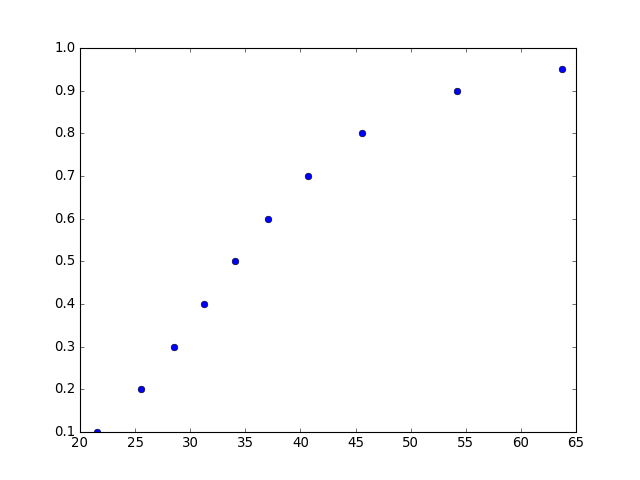

In [3]:
x = ori['x']
y = ori['y']
plt.close('all')
plt.style.use('classic')
plt.figure().patch.set_facecolor('w')
plt.plot(x,y,'o')

In [4]:
a =np.array(ori["x"])
b = np.array(ori["y"])
c = np.linspace(21.5,54.24, 1000) 

In [5]:
m1,s1  = curve_fit(norm.cdf, a, b ,p0=[20,1])[0]
c_y =norm.cdf(c, m1,s1 )

In [388]:
s1

11.996750670661058

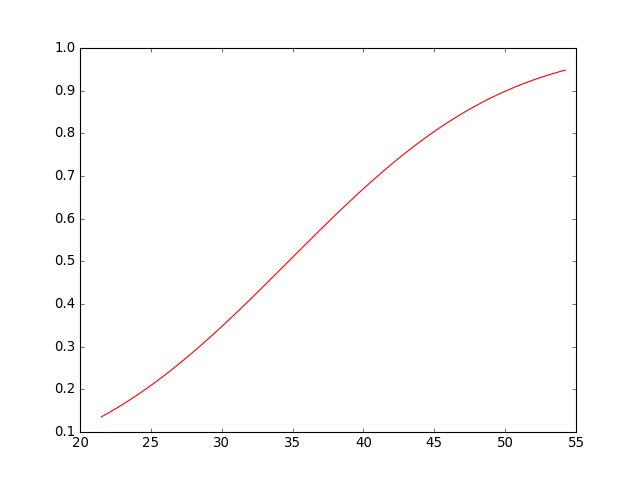

In [6]:
plt.close('all')
plt.style.use('classic')
fig,ax3 = plt.subplots()
ax3.plot(c,c_y, 'r-', label='fit')

In [267]:
list(c)


[21.5,
 21.532772772772773,
 21.565545545545547,
 21.59831831831832,
 21.63109109109109,
 21.663863863863863,
 21.696636636636637,
 21.72940940940941,
 21.762182182182183,
 21.794954954954957,
 21.827727727727726,
 21.8605005005005,
 21.893273273273273,
 21.926046046046046,
 21.95881881881882,
 21.991591591591593,
 22.024364364364363,
 22.057137137137136,
 22.08990990990991,
 22.122682682682683,
 22.155455455455456,
 22.18822822822823,
 22.221001001001,
 22.253773773773773,
 22.286546546546546,
 22.31931931931932,
 22.352092092092093,
 22.384864864864866,
 22.417637637637636,
 22.45041041041041,
 22.483183183183183,
 22.515955955955956,
 22.54872872872873,
 22.581501501501503,
 22.614274274274273,
 22.647047047047046,
 22.67981981981982,
 22.712592592592593,
 22.745365365365366,
 22.77813813813814,
 22.810910910910913,
 22.843683683683683,
 22.876456456456456,
 22.90922922922923,
 22.942002002002003,
 22.974774774774776,
 23.00754754754755,
 23.04032032032032,
 23.073093093093092,
 23.

In [7]:
spl = UnivariateSpline(c, c_y, k=2, s=0)
#spl.derivatives(n)返回n的导数值，0~3阶
spl.derivatives(c[0])

array([0.13532401, 0.01812787, 0.00166529])

In [8]:
def trans (x):
    return spl.derivatives(x)[1]
trans(c[0])

0.018127872274924507

In [9]:
trans_re = []
for x in c:
    b = trans(x)
    trans_re.append(b)
t= np.array(trans_re)/0.033*0.105
T = np.array([spl.derivatives(x)[1] for x in c])/0.033*0.105
T

array([0.05767959, 0.05785325, 0.05802695, 0.05820075, 0.05837463,
       0.05854859, 0.05872263, 0.05889676, 0.05907095, 0.05924522,
       0.05941956, 0.05959397, 0.05976845, 0.05994299, 0.06011759,
       0.06029225, 0.06046696, 0.06064173, 0.06081655, 0.06099142,
       0.06116633, 0.06134129, 0.06151629, 0.06169133, 0.0618664 ,
       0.06204151, 0.06221665, 0.06239182, 0.06256702, 0.06274224,
       0.06291748, 0.06309273, 0.06326801, 0.0634433 , 0.0636186 ,
       0.0637939 , 0.06396922, 0.06414453, 0.06431985, 0.06449516,
       0.06467047, 0.06484578, 0.06502107, 0.06519635, 0.06537161,
       0.06554686, 0.06572208, 0.06589729, 0.06607246, 0.06624761,
       0.06642273, 0.06659781, 0.06677285, 0.06694786, 0.06712282,
       0.06729774, 0.06747261, 0.06764743, 0.0678222 , 0.06799691,
       0.06817156, 0.06834615, 0.06852068, 0.06869514, 0.06886953,
       0.06904385, 0.06921809, 0.06939225, 0.06956634, 0.06974034,
       0.06991425, 0.07008807, 0.0702618 , 0.07043544, 0.07060

[(0.0, 100.0)]

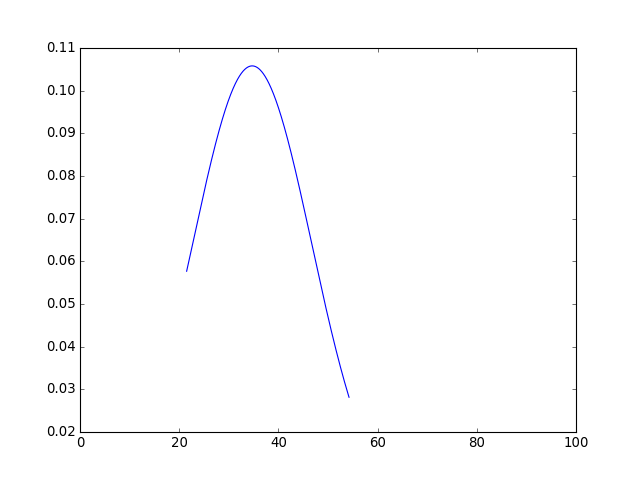

In [10]:
plt.close('all')
plt.style.use('classic')
fig,ax2 = plt.subplots()
ax2.plot(c,T, 'b-', label='fit')
ax2.set(xlim=(0,100))

In [21]:
model = GaussianModel()
X = c
Y = t
X_in = np.linspace(0,100,1000)

In [22]:
params = model.guess(Y, x=X)#猜测模型起始值作为初始参数
result = model.fit(Y,params, x=X)
norm_re = norm.pdf(X_in,loc=34.7152782,scale = 11.9967543)*3.18
#norm_re2 = norm_re/(np.max(norm_re))*0.106


In [23]:
save_to = pd.DataFrame({"x":X_in,"y":norm_re})
save_to

,x,y
0,0.0000,1.606803e-03
1,0.1001,1.646015e-03
2,0.2002,1.686065e-03
3,0.3003,1.726970e-03
4,0.4004,1.768744e-03
...,...,...
995,99.5996,4.702561e-08
996,99.6997,4.494904e-08
997,99.7998,4.296118e-08
998,99.8999,4.105837e-08


In [376]:
save_to.to_csv(r"E:\IDEA python worklist\picture_export\dot_result.csv",sep=',',index=False,header=False)

[[Model]]
    Model(gaussian)
[[Fit Statistics]]
    # fitting method   = leastsq
    # function evals   = 17
    # data points      = 1000
    # variables        = 3
    chi-square         = 1.1975e-14
    reduced chi-square = 1.2011e-17
    Akaike info crit   = -38957.7347
    Bayesian info crit = -38943.0115
[[Variables]]
    amplitude:  3.18181817 +/- 7.8464e-09 (0.00%) (init = 2.668816)
    center:     34.7152782 +/- 2.8469e-08 (0.00%) (init = 34.72381)
    sigma:      11.9967543 +/- 3.8059e-08 (0.00%) (init = 11.45408)
    fwhm:       28.2501971 +/- 8.9622e-08 (0.00%) == '2.3548200*sigma'
    height:     0.10580877 +/- 1.8385e-10 (0.00%) == '0.3989423*amplitude/max(1e-15, sigma)'
[[Correlations]] (unreported correlations are < 0.100)
    C(amplitude, sigma)  = 0.839
    C(amplitude, center) = -0.356
    C(center, sigma)     = -0.355


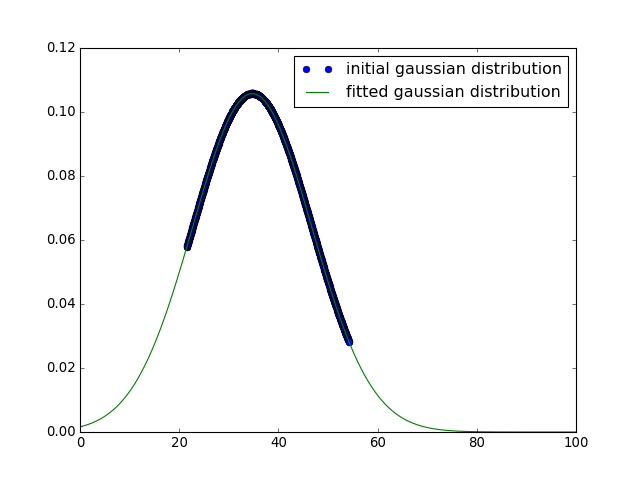

In [25]:
plt.style.use('classic')
fig = plt.figure()
fig.patch.set_facecolor('w')  # 図全体の背景色
plt.plot(X, Y, 'o',label='initial gaussian distribution')
#plt.plot(X, t, linewidth=4, label='initial gaussian distribution')
#plt.plot(X, result.best_fit, '-', label='fit')
plt.plot(X_in, norm_re, '-', label='fitted gaussian distribution')
#plt.plot(X, norm_re2, '-', label='norm2 fit')
plt.xlim(0,100)
plt.legend()
Report = result.fit_report()
print(Report)